<a href="https://colab.research.google.com/github/HyeongChanHam/Lung_Cancer_detection/blob/master/U_net.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os
import numpy as np
import random
import sys
import tensorflow as tf
import matplotlib.pyplot as plt
from skimage.io import imread, imshow

from tqdm import tqdm

from skimage.transform import resize

In [3]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [6]:
!ls sample_data

anscombe.json		      mnist_test.csv
california_housing_test.csv   mnist_train_small.csv
california_housing_train.csv  README.md


In [7]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
PATH = "gdrive/My Drive/lung_cancer/"

In [0]:
img_path = PATH+'image/'
label_path = PATH+'mask/'

In [55]:
img_ids = next(os.walk(img_path))[2]
label_ids = next(os.walk(label_path))[2]
img_ids.sort()
label_ids.sort()
print(len(img_ids))
print(len(label_ids))

742
742


In [0]:
img = imread(img_path + img_ids[0])
plt.imshow(img)
plt.show()
img = imread(img_path + img_ids[1])
plt.imshow(img)
plt.show()
img = imread(img_path + img_ids[2])
plt.imshow(img)
plt.show()
label = imread(label_path + label_ids[0])
plt.imshow(label)
plt.show()


In [0]:
IMG_WIDTH = 128
IMG_HEIGHT = 128
IMG_CHANNELS = 1

In [33]:
import re
i = img_ids[0]
reg = re.compile(r'image.*_0.png')
s = reg.search(i)
print(s[0])
one_ids = list(filter(reg.match,img_ids))

reg = re.compile(r'mask.*_0.png')
label_ids = list(filter(reg.match, label_ids))
print(img_ids)
print(one_ids)

image_LIDC-IDRI-0001_0_0.png
['image_LIDC-IDRI-0001_0_0.png', 'image_LIDC-IDRI-0001_0_1.png', 'image_LIDC-IDRI-0001_0_2.png', 'image_LIDC-IDRI-0001_0_3.png', 'image_LIDC-IDRI-0001_0_4.png', 'image_LIDC-IDRI-0001_0_5.png', 'image_LIDC-IDRI-0001_0_6.png', 'image_LIDC-IDRI-0001_0_7.png', 'image_LIDC-IDRI-0002_0_0.png', 'image_LIDC-IDRI-0002_0_1.png', 'image_LIDC-IDRI-0002_0_10.png', 'image_LIDC-IDRI-0002_0_11.png', 'image_LIDC-IDRI-0002_0_12.png', 'image_LIDC-IDRI-0002_0_13.png', 'image_LIDC-IDRI-0002_0_14.png', 'image_LIDC-IDRI-0002_0_15.png', 'image_LIDC-IDRI-0002_0_16.png', 'image_LIDC-IDRI-0002_0_17.png', 'image_LIDC-IDRI-0002_0_18.png', 'image_LIDC-IDRI-0002_0_19.png', 'image_LIDC-IDRI-0002_0_2.png', 'image_LIDC-IDRI-0002_0_20.png', 'image_LIDC-IDRI-0002_0_21.png', 'image_LIDC-IDRI-0002_0_22.png', 'image_LIDC-IDRI-0002_0_23.png', 'image_LIDC-IDRI-0002_0_24.png', 'image_LIDC-IDRI-0002_0_25.png', 'image_LIDC-IDRI-0002_0_26.png', 'image_LIDC-IDRI-0002_0_27.png', 'image_LIDC-IDRI-0002_0_

In [56]:
X_train = np.zeros((len(img_ids), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
Y_train = np.zeros((len(img_ids), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.bool)
print('Getting and resizing train images and masks ... ')
sys.stdout.flush()
for n, id_ in tqdm(enumerate(img_ids), total=len(img_ids)):
    path = img_path + id_
    img = np.expand_dims(imread(path),axis=2)
    img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
    X_train[n] = img

for n, id_ in tqdm(enumerate(label_ids), total=len(label_ids)):
    mask = np.zeros((IMG_HEIGHT, IMG_WIDTH), dtype=np.bool)
    path = label_path + id_
    label = np.expand_dims(imread(path), axis=2)
    mask = resize(label, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
    Y_train[n] = mask

Getting and resizing train images and masks ... 


100%|██████████| 742/742 [02:35<00:00,  4.78it/s]


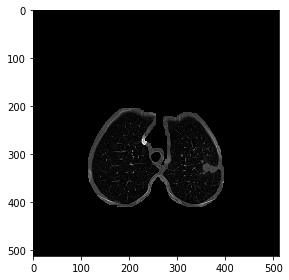

In [32]:
imshow('gdrive/My Drive/lung_cancer/mask/mask_LIDC-IDRI-0058_2_3.png')
# print(img_path + img_ids[0])
# gdrive/My Drive/lung_cancer/image/image_LIDC-IDRI-0001_0_0.png

image_LIDC-IDRI-0011_1_2.png


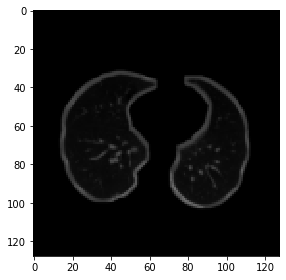

/usr/local/lib/python3.6/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


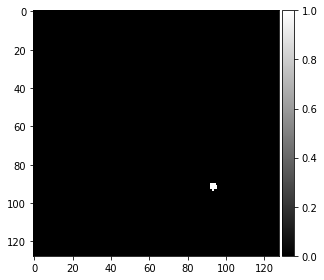

In [38]:
ix = random.randint(0, len(one_ids))
print(img_ids[ix])
imshow(X_train[ix][:,:,0])
plt.show()
imshow(Y_train[ix][:,:,0],cmap=plt.cm.gray)
plt.show()

In [0]:
# Define IoU metric
from keras import backend as K
# def iou(y_true, y_pred):
#     y_true = tf.cast(y_true, tf.bool)
#     intersection = K.sum(K.abs(y_true * y_pred), axis=-1)
#     union = K.sum(y_true, -1) + K.sum(y_pred, -1) - intersection
#     iou = (intersection) / (union)
#     return iou


# def iou_loss(y_true, y_pred):
#     intersection = K.sum(K.abs(y_true * y_pred), axis=-1)
#     union = K.sum(y_true, -1) + K.sum(y_pred, -1) - intersection
#     iou = (intersection) / (union)
#     return -iou

def iou(y_true, y_pred):
    intersection = (y_true[:,:,0]*y_pred[:,:,0]).sum()
    union =y_true[:,:,0].sum() + y_pred[:,:,0].sum() - intersection
    return intersection/union



# def iou(y_true, y_pred):
#     intersection = tf.reduce_sum(y_true[:,:,0]*y_pred[:,:,0])
#     union =tf.reduce_sum(y_true[:,:,0]) + tf.reduce_sum(y_pred[:,:,0]) - intersection
#     return intersection/union

In [0]:
# print(mean/_iou(Y_train[0], Y_train[0]))
for i in range(10):
    fig, ax = plt.subplots(1,2,figsize=(5,3))
    ax[0].imshow((Y_train[0] * Y_train[i])[:,:,0])
    # plt.show()
    ax[0].title.set_text(i)
    ax[1].imshow((Y_train[0] + Y_train[i])[:,:,0])
    # plt.show()
    intersection = (Y_train[0] * Y_train[i]).sum()
    union = (Y_train[0].sum()) + (Y_train[i].sum()) - intersection
    ax[1].title.set_text(intersection/union)
    plt.show()

In [0]:
from keras.models import Model, load_model
from keras.optimizers import Adam
from keras.layers import Input
from keras.layers.core import Dropout, Lambda
from keras.layers.convolutional import Conv2D, Conv2DTranspose
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import concatenate
from keras.callbacks import EarlyStopping, ModelCheckpoint


inputs = Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
s = Lambda(lambda x: x / 255) (inputs)

c1 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (s)
c1 = Dropout(0.1) (c1)
c1 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c1)
p1 = MaxPooling2D((2, 2)) (c1)

c2 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p1)
c2 = Dropout(0.1) (c2)
c2 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c2)
p2 = MaxPooling2D((2, 2)) (c2)

c3 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p2)
c3 = Dropout(0.2) (c3)
c3 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c3)
p3 = MaxPooling2D((2, 2)) (c3)

c4 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p3)
c4 = Dropout(0.2) (c4)
c4 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c4)
p4 = MaxPooling2D(pool_size=(2, 2)) (c4)

c5 = Conv2D(256, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p4)
c5 = Dropout(0.3) (c5)
c5 = Conv2D(256, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c5)

u6 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same') (c5)
u6 = concatenate([u6, c4])
c6 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u6)
c6 = Dropout(0.2) (c6)
c6 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c6)

u7 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same') (c6)
u7 = concatenate([u7, c3])
c7 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u7)
c7 = Dropout(0.2) (c7)
c7 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c7)

u8 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same') (c7)
u8 = concatenate([u8, c2])
c8 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u8)
c8 = Dropout(0.1) (c8)
c8 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c8)

u9 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same') (c8)
u9 = concatenate([u9, c1], axis=3)
c9 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u9)
c9 = Dropout(0.1) (c9)
c9 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c9)

outputs = Conv2D(1, (1, 1), activation='sigmoid') (c9)

model = Model(inputs=[inputs], outputs=[outputs])
adam = Adam(lr = 0.001, beta_1=0.9, beta_2=0.999)
model.compile(optimizer=adam, loss='binary_crossentropy')

model.summary()

In [57]:
earlystopper = EarlyStopping(patience=10, verbose=1)
checkpointer = ModelCheckpoint('model-dsbowl2020-4.h5', verbose=1, save_best_only=True)
with tf.device('/device:GPU:0'):
    results = model.fit(X_train, Y_train, validation_split=0.1, batch_size=16, epochs=100, 
                    callbacks=[earlystopper, checkpointer])

Train on 667 samples, validate on 75 samples
Epoch 1/100
667/667 [==============================] - 6s 9ms/step - loss: 0.0087 - val_loss: 0.0078

Epoch 00001: val_loss improved from inf to 0.00777, saving model to model-dsbowl2020-4.h5
Epoch 2/100
667/667 [==============================] - 5s 7ms/step - loss: 0.0077 - val_loss: 0.0080

Epoch 00002: val_loss did not improve from 0.00777
Epoch 3/100
667/667 [==============================] - 5s 7ms/step - loss: 0.0077 - val_loss: 0.0080

Epoch 00003: val_loss did not improve from 0.00777
Epoch 4/100
667/667 [==============================] - 5s 7ms/step - loss: 0.0071 - val_loss: 0.0087

Epoch 00004: val_loss did not improve from 0.00777
Epoch 5/100
667/667 [==============================] - 5s 7ms/step - loss: 0.0065 - val_loss: 0.0077

Epoch 00005: val_loss improved from 0.00777 to 0.00769, saving model to model-dsbowl2020-4.h5
Epoch 6/100
667/667 [==============================] - 5s 7ms/step - loss: 0.0059 - val_loss: 0.0082

Epoch 

In [0]:
#model-dsbowl2018-1.h5 download
from google.colab import files
files.download('model-dsbowl2020-4.h5')

In [88]:
# Predict on train, val and test
# model = load_model('model-dsbowl2020-4.h5')
preds_train = model.predict(X_train[:int(X_train.shape[0]*0.9)], verbose=1)
preds_val = model.predict(X_train[int(X_train.shape[0]*0.9):], verbose=1)

# Threshold predictions
preds_train_t = (preds_train > 0.25).astype(np.uint8)
preds_val_t = (preds_val > 0.5).astype(np.uint8)

75/75 [==============================] - 0s 2ms/step


In [0]:
pixels = [x for x in preds_train.reshape(-1) if x != 0]

In [87]:
bins = np.array([x*0.1 for x in range(0,10)])
inds = np.digitize(pixels, bins)
print(pixels)
print(inds)
for idx, i in enumerate(inds[60:70]):
    print(bins[i],"<",pixels[idx],",",bins[i+1])
pixels.max()

[2.2381691e-03 1.1394917e-04 5.9756087e-05 ... 9.1772126e-05 2.0436794e-04
 2.2516083e-03]
[1 1 1 ... 1 1 1]
0.1 < 0.002238169 , 0.2
0.1 < 0.00011394917 , 0.2
0.1 < 5.9756087e-05 , 0.2
0.1 < 2.5756488e-05 , 0.2
0.1 < 9.2407e-06 , 0.2
0.1 < 3.7782524e-06 , 0.2
0.1 < 9.502086e-06 , 0.2
0.1 < 1.9748625e-06 , 0.2
0.1 < 1.409764e-06 , 0.2
0.1 < 3.544425e-07 , 0.2


0.9945762

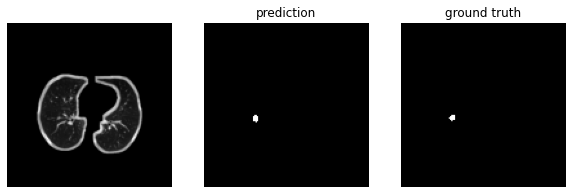

iou :  0.7142857142857143


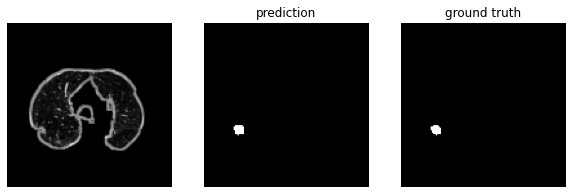

iou :  0.8867924528301887


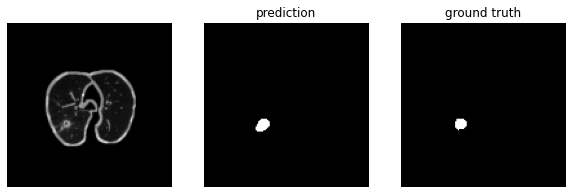

iou :  0.7590361445783133


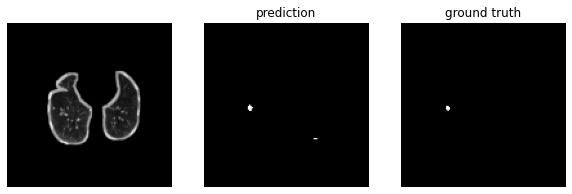

iou :  0.47058823529411764


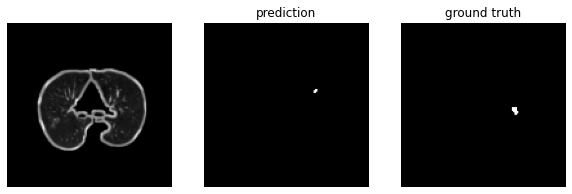

iou :  0.0


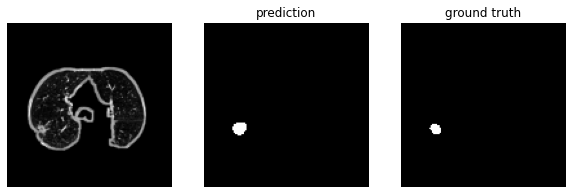

iou :  0.6206896551724138


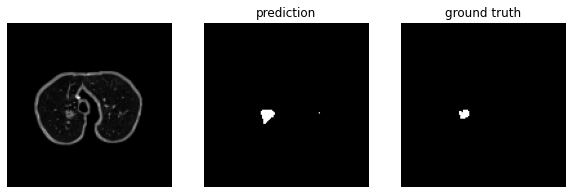

iou :  0.55


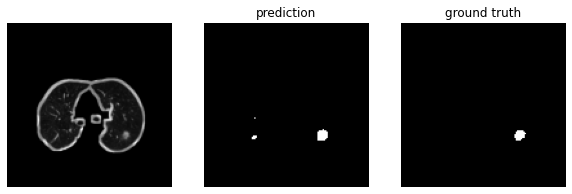

iou :  0.7222222222222222


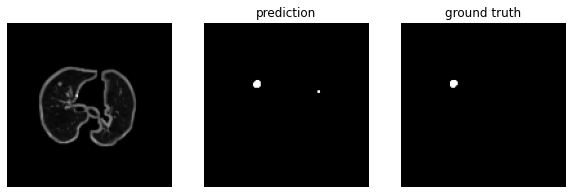

iou :  0.7777777777777778


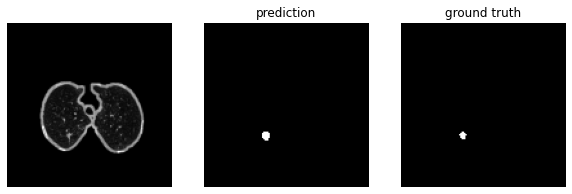

iou :  0.6571428571428571
[0.81355932 0.86516854 0.89108911 0.7704918  0.82608696 0.80952381
 0.77227723 0.7875     0.5        0.5625     0.75       0.78571429
 0.72839506 0.81395349 0.92857143 0.90588235 0.81818182 0.82142857
 0.82894737 0.77922078 0.72222222 0.73134328 0.82142857 0.88888889
 0.73170732 0.61111111 0.6        0.53571429 0.63636364 0.775
 0.79069767 0.83333333 0.83018868 0.86206897 0.78125    0.66666667
 0.20833333 0.12903226 0.42372881 0.75342466 0.77906977 0.76829268
 0.64383562 0.56923077 0.57777778 0.74576271 0.80952381 0.90625
 0.86666667 0.82278481 0.72222222 0.         0.17391304 0.10344828
 0.         0.56410256 0.61904762 0.75675676 0.80645161 0.76470588
 0.63157895 0.40909091 0.73684211 0.7        0.625      0.55223881
 0.55       0.68965517 0.71264368 0.75789474 0.86516854 0.75862069
 0.55294118 0.32835821 0.         0.12121212 0.4        0.41666667
 0.         0.46666667 0.52941176 0.5        0.25       0.66666667
 0.40909091 0.         0.         0.3125    

In [89]:
iou_vec = np.array([])
for i in range(10):
    ix = random.randint(0, len(preds_train_t))
    fig, ax = plt.subplots(1,3,figsize=(10,6))
    ax[0].imshow(X_train[ix][:,:,0],cmap='gray')
    ax[0].axis('off')
    ax[1].imshow(np.squeeze(preds_train_t[ix][:,:,0]),cmap='gray')
    ax[1].title.set_text("prediction")
    ax[1].axis('off')
    ax[2].imshow(np.squeeze(Y_train[ix][:,:,0]),cmap='gray')
    ax[2].title.set_text("ground truth")
    ax[2].axis('off')
    plt.show()
    print("iou : ",iou(preds_train_t[ix].astype(np.bool),Y_train[ix]))
    # print(preds_train_t[ix].astype(np.bool).shape)
    # preds_train_t[ix].astype(np.bool) + 
for i in range(len(preds_train_t)):
    iou_vec = np.append(iou_vec, iou(preds_train_t[i].astype(np.bool),Y_train[i]))
print(iou_vec)
print(iou_vec.mean())

In [90]:
np.where(iou_vec>0,1,0).mean()

0.8920539730134932